In [1]:
#Importar Bibliotecas
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
import pylab
import statsmodels.api as sm
from imblearn.over_sampling import SMOTENC
import math

In [2]:
#Importar Dados
df = pd.read_csv('dadosbdd.csv')
display(df)

,idade_posse,valor_total_declarado,nome_completo,municipio,partido,uf_nascimento,genero,grau_instrucao,estado_civil,declar_racial,reeleicao,declar_bens,situacao
0,33,1285.00,EDILENE PEREIRA NEVES MACIEL,IGARAPÉ-MIRI,PC do B,PA,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,N,S,NÃO ELEITO
1,37,2692.70,JESSE OLIVEIRA DA SILVA,ULIANÓPOLIS,PTB,MA,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,N,S,NÃO ELEITO
2,31,4528.68,ELIENE DALVA SILVA DAS NEVES OLIVEIRA,SANTARÉM,PSD,PA,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,N,S,NÃO ELEITO
3,31,1943.72,PAULO CAMPOS SOARES,BREVES,PT,PA,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,N,N,NÃO ELEITO
4,32,600.00,RAMON DOS SANTOS SARAIVA,BARCARENA,REPUBLICANOS,PA,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,N,N,NÃO ELEITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9330,36,4400.00,VANDERLEI PEREIRA DA COSTA,BREJO GRANDE DO ARAGUAIA,PDT,PA,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),SEM INFORMAÇÃO,N,S,NÃO ELEITO
9331,31,10114.45,FERNANDA REIS DA SILVA,BREVES,PMN,PA,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,N,S,NÃO ELEITO
9332,33,1500.00,MARIA JOSIANE SOUZA LIMA,SANTA MARIA DO PARÁ,DEM,PA,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,N,S,NÃO ELEITO
9333,33,1100.00,FERNANDA DOS SANTOS DA SILVA NASCIMENTO,BREU BRANCO,PL,PA,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,S,S,ELEITO


In [3]:
#Verificar nome das colunas
df.columns.all

<bound method Index.all of Index(['idade_posse', 'valor_total_declarado', 'nome_completo', 'municipio',
       'partido', 'uf_nascimento', 'genero', 'grau_instrucao', 'estado_civil',
       'declar_racial', 'reeleicao', 'declar_bens', 'situacao'],
      dtype='object')>

# Análise Exploratória dos Dados

In [4]:
#Verificar quantos registros nulos em cada variável
df.isnull().sum()

idade_posse              0
valor_total_declarado    0
nome_completo            0
municipio                0
partido                  0
uf_nascimento            0
genero                   0
grau_instrucao           0
estado_civil             0
declar_racial            0
reeleicao                0
declar_bens              0
situacao                 0
dtype: int64

### Variável Dependente

<AxesSubplot:xlabel='situacao', ylabel='count'>

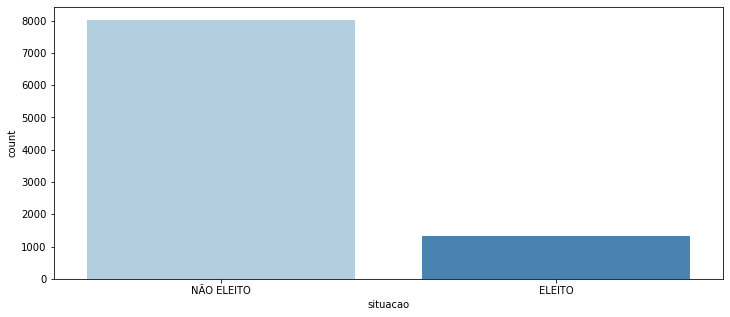

In [5]:
# Qual a distribuição da variável dependente?
plt.figure(figsize=(12,5))
sns.countplot(x='situacao',data=df, palette='Blues')

In [6]:
# Quantidade de eleitos e não eleitos
df.groupby(['situacao']).size()

situacao
ELEITO        1313
NÃO ELEITO    8022
dtype: int64

In [7]:
# Percentual dos registros de eleitos e não eleitos
print('Eleitos:', round(1313 / 9335 * 100),'%')
print('Não Eleitos:', round(8022 / 9335 * 100),'%')

Eleitos: 14 %
Não Eleitos: 86 %


Usando o critério de 30% de corte, vamos balancear a classe

### Qual é a distribuição das variáveis quantitativas?

##### Idade na posse

<AxesSubplot:xlabel='situacao', ylabel='idade_posse'>

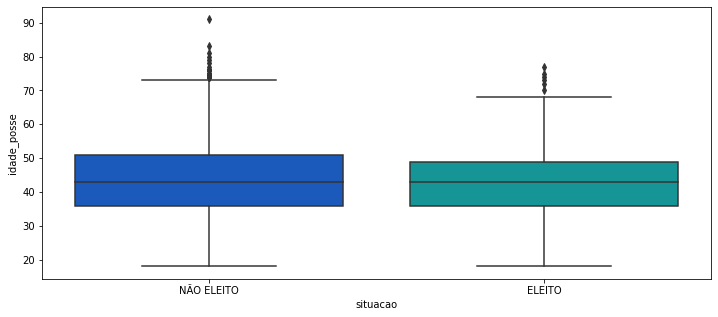

In [8]:
#Distribuição conjunta dos sobrevivente pela Idade
plt.figure(figsize=(12,5))
sns.boxplot(x='situacao',y='idade_posse',data=df,palette='winter')

Aparentemente há pouca relação entre a idade e a situação

<AxesSubplot:xlabel='idade_posse', ylabel='valor_total_declarado'>

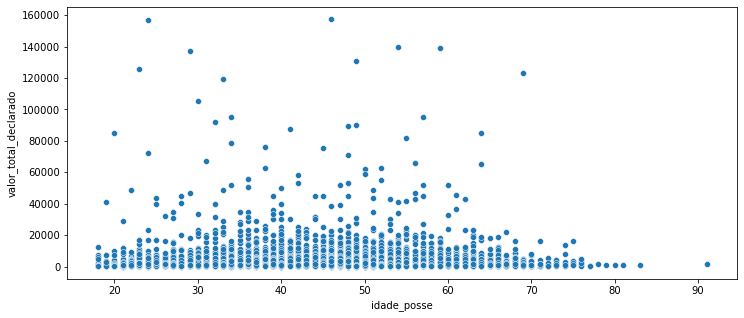

In [15]:
#Dispersão entre o valor total declarado pela Idade
plt.figure(figsize=(12,5))
sns.scatterplot(x='idade_posse',y='valor_total_declarado',data=df,palette='winter')

aparentemente não há uma correlação bem clara entre idade_posse e valor_total_declarado

<AxesSubplot:xlabel='genero', ylabel='idade_posse'>

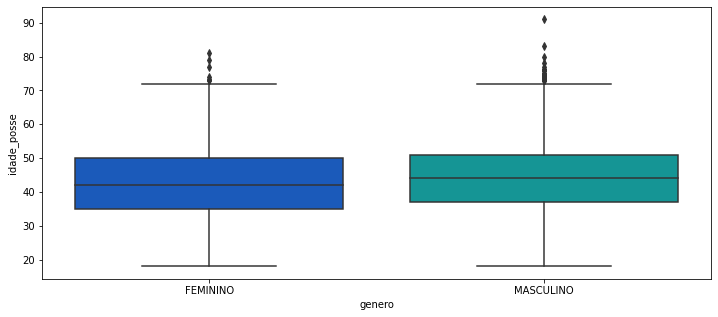

In [14]:
#Distribuição conjunta dos genero pela Idade
plt.figure(figsize=(12,5))
sns.boxplot(x='genero',y='idade_posse',data=df,palette='winter')

Aparentemente há pouca relação entre a idade e a genero

<AxesSubplot:xlabel='grau_instrucao', ylabel='idade_posse'>

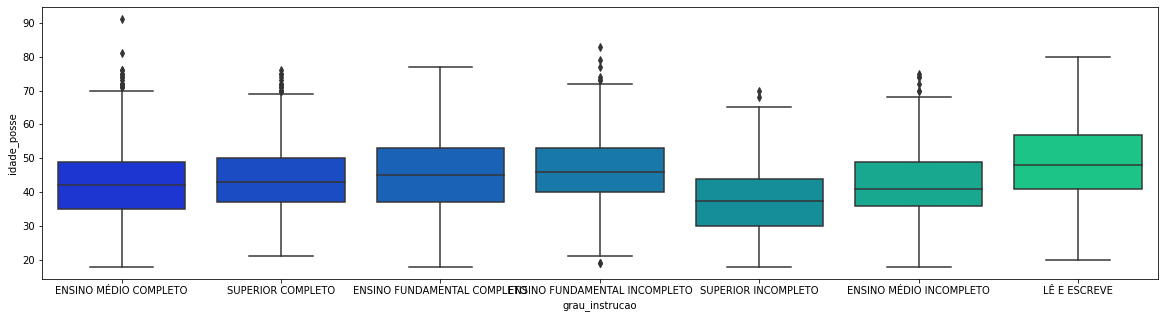

In [13]:
#Distribuição conjunta dos grau de instrução pela Idade
plt.figure(figsize=(20,5))
sns.boxplot(x='grau_instrucao',y='idade_posse',data=df,palette='winter')

Aparentemente quem tem superior incompleto são candidatos um pouco mais novos que os outros

<AxesSubplot:xlabel='estado_civil', ylabel='idade_posse'>

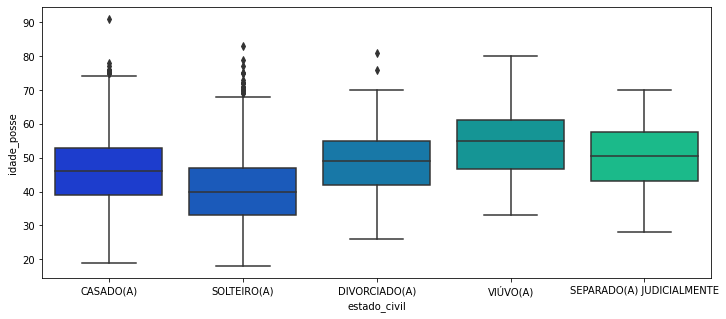

In [18]:
#Distribuição conjunta do estado civil pela Idade
plt.figure(figsize=(12,5))
sns.boxplot(x='estado_civil',y='idade_posse',data=df,palette='winter')

Candidatos solteiros são mais novos, viúvos são mais velhos

<AxesSubplot:xlabel='declar_racial', ylabel='idade_posse'>

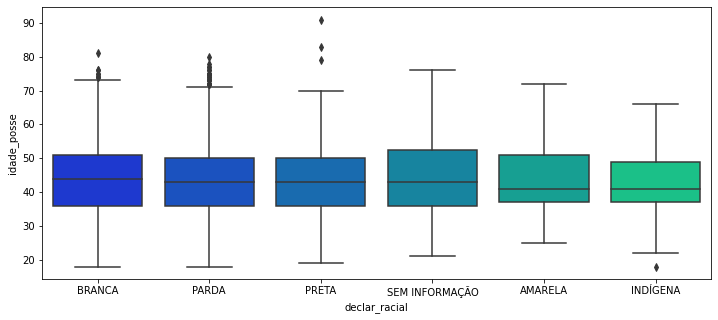

In [19]:
#Distribuição conjunta da declaração racial pela Idade
plt.figure(figsize=(12,5))
sns.boxplot(x='declar_racial',y='idade_posse',data=df,palette='winter')

Aparentemente não há diferença de idade entre os candidatos de diversas raças declaradas

<AxesSubplot:xlabel='reeleicao', ylabel='idade_posse'>

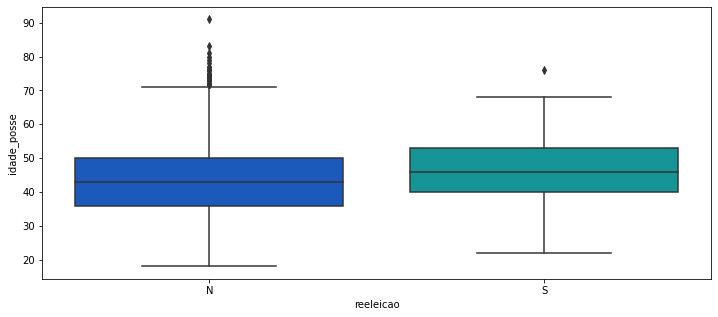

In [21]:
#Distribuição conjunta da reeleição pela Idade
plt.figure(figsize=(12,5))
sns.boxplot(x='reeleicao',y='idade_posse',data=df,palette='winter')

Aparentemente candidatos a reeleição são um pouco mais velhos

<AxesSubplot:xlabel='declar_bens', ylabel='idade_posse'>

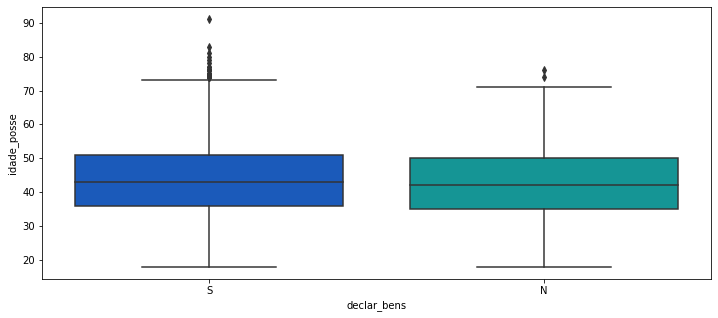

In [23]:
#Distribuição conjunta da declaração de bens pela Idade
plt.figure(figsize=(12,5))
sns.boxplot(x='declar_bens',y='idade_posse',data=df,palette='winter')

Aparentemente não há diferença de idade entre os candidatos que declararam bens e que não declararam

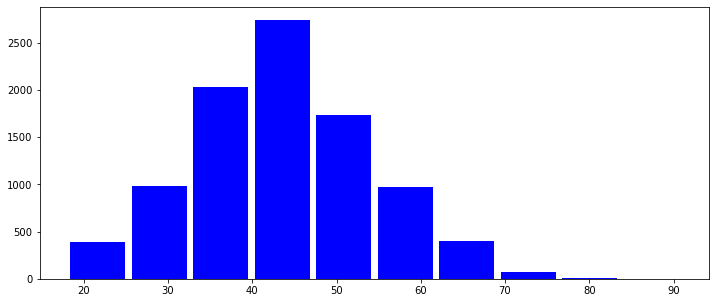

C:\Users\kleub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


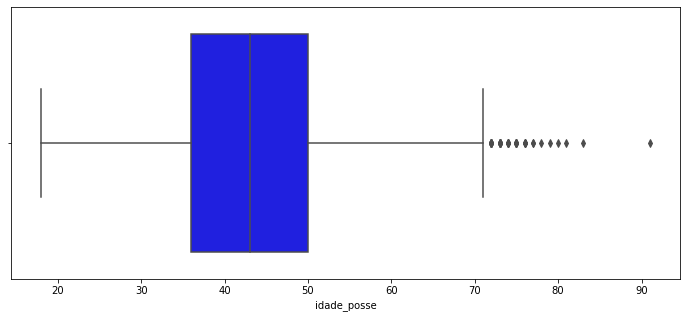

In [34]:
# Verificando a distribuição da variável Idade
plt.figure(figsize=(12,5))
plt.hist(df['idade_posse'], 10, rwidth=0.9, color='blue')
plt.show()
plt.figure(figsize=(12,5))
sns.boxplot(df['idade_posse'], color='blue')
plt.show()

In [33]:
#Verificando medidas de dispersão
df['idade_posse'].describe()

count    9335.000000
mean       43.545153
std        10.541330
min        18.000000
25%        36.000000
50%        43.000000
75%        50.000000
max        91.000000
Name: idade_posse, dtype: float64

Os candidatos possuem entre 18 e 91 anos;

A idade média dos candidatos é aproximadamente 43 anos;

A mediana das idades é 43 anos;

75% dos candidatos possuem até 50 anos;

##### Valor Total Declarado

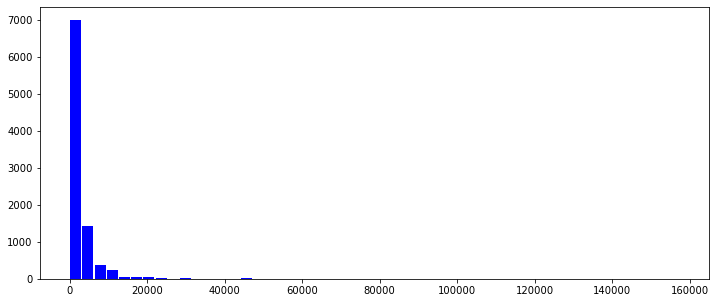

C:\Users\kleub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


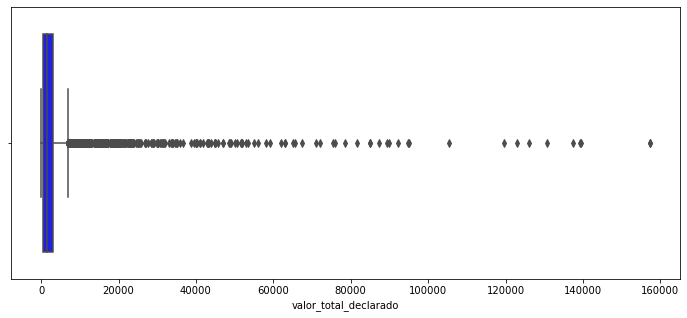

count      9335.000000
mean       3134.696767
std        7240.430671
min           0.700000
25%         609.910000
50%        1457.500000
75%        3136.755000
max      157296.500000
Name: valor_total_declarado, dtype: float64

In [41]:
# Verificando a distribuição da variável Valor total Declarado
plt.figure(figsize=(12,5))
plt.hist(df['valor_total_declarado'], 50, rwidth=0.9, color='blue')
plt.show()
plt.figure(figsize=(12,5))
sns.boxplot(df['valor_total_declarado'], color='blue')
plt.show()
#Verificando medidas de dispersão
df['valor_total_declarado'].describe()

Os candidatos declararam entre 0,70 centavos e 157296 reais;

A média do valor total declarado é de 3134 reais aproximadamente;

A mediana do valor total declarado é de 1457,50 reais;

75% dos candidatos declararam até 313675 reais;

##### Sobre as variáveis Numéricas:
##### Na variável Idade na posse:
Os candidatos possuem entre 18 e 91 anos;

A idade média dos candidatos é aproximadamente 43 anos;

A mediana das idades é 43 anos;

75% dos candidatos possuem até 50 anos;

a idade segue uma distribuição normal;

há pouca relação com a variável alvo;

Aparentemente quem tem superior incompleto são candidatos um pouco mais novos que os outros;

Candidatos solteiros são mais novos, viúvos são mais velhos;

Aparentemente candidatos a reeleição são um pouco mais velhos;

##### Na variável Tarifa:
Os candidatos declararam entre 0,70 centavos e 157296 reais;

A média do valor total declarado é de 3134 reais aproximadamente;

A mediana do valor total declarado é de 1457,50 reais;

75% dos candidatos declararam até 313675 reais;

### Qual é a distribuição de recursos categóricos?

##### genero

<AxesSubplot:xlabel='situacao', ylabel='count'>

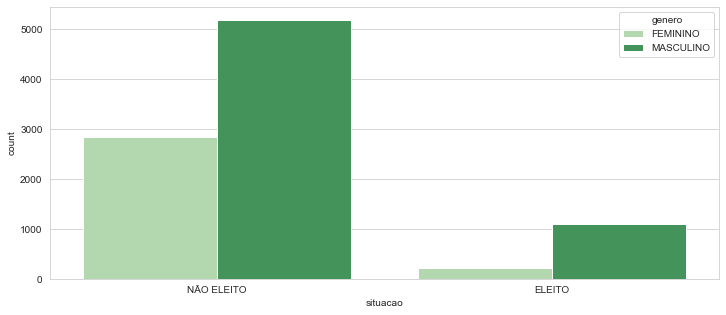

In [43]:
#Distribuição conjunta da situação por genero

plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot(x='situacao',hue='genero',data=df,palette='Greens')

In [44]:
#Contagem de sobrevivente por genero
df.groupby(['genero']).size()

genero
FEMININO     3060
MASCULINO    6275
dtype: int64

In [45]:
#Distribuição conjunta da proporção em relação ao total de sobrevivente por genero
data_crosstab = pd.crosstab(df['genero'],
                            df['situacao'], 
                               margins = False,
                           normalize='index')
pd.DataFrame(data_crosstab)

situacao,ELEITO,NÃO ELEITO
genero,,
FEMININO,0.070588,0.929412
MASCULINO,0.174821,0.825179


Somente 7% das mulheres foram eleitas;

17% dos homens foram eleitos

<AxesSubplot:xlabel='situacao', ylabel='count'>

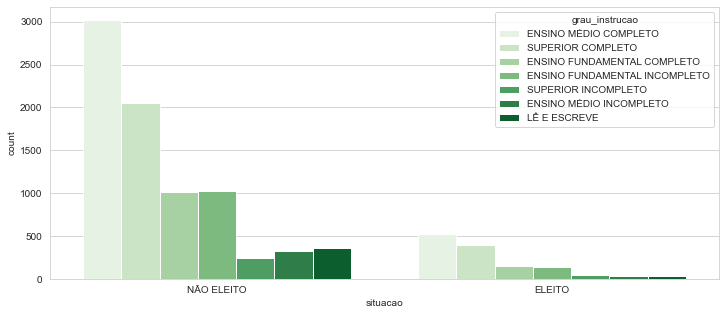

In [46]:
#Distribuição conjunta da situação por grau_instrucao

plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot(x='situacao',hue='grau_instrucao',data=df,palette='Greens')

In [47]:
#Contagem de sobrevivente por grau_instrucao
df.groupby(['grau_instrucao']).size()

grau_instrucao
ENSINO FUNDAMENTAL COMPLETO      1157
ENSINO FUNDAMENTAL INCOMPLETO    1154
ENSINO MÉDIO COMPLETO            3545
ENSINO MÉDIO INCOMPLETO           357
LÊ E ESCREVE                      397
SUPERIOR COMPLETO                2445
SUPERIOR INCOMPLETO               280
dtype: int64

In [49]:
#Distribuição conjunta da proporção em relação ao total de sobrevivente por grau_instrucao
data_crosstab = pd.crosstab(df['situacao'],
                            df['grau_instrucao'], 
                               margins = False,
                           normalize='index')
pd.DataFrame(data_crosstab)

grau_instrucao,ENSINO FUNDAMENTAL COMPLETO,ENSINO FUNDAMENTAL INCOMPLETO,ENSINO MÉDIO COMPLETO,ENSINO MÉDIO INCOMPLETO,LÊ E ESCREVE,SUPERIOR COMPLETO,SUPERIOR INCOMPLETO
situacao,,,,,,,
ELEITO,0.110434,0.102818,0.399848,0.028941,0.025895,0.302361,0.029703
NÃO ELEITO,0.126153,0.127026,0.376465,0.039766,0.045251,0.255298,0.030042


39% dos candidatos eleitos possuem ensino médio completo;

37% dos candidatos não eleitos possuem ensino médio completo

<AxesSubplot:xlabel='situacao', ylabel='count'>

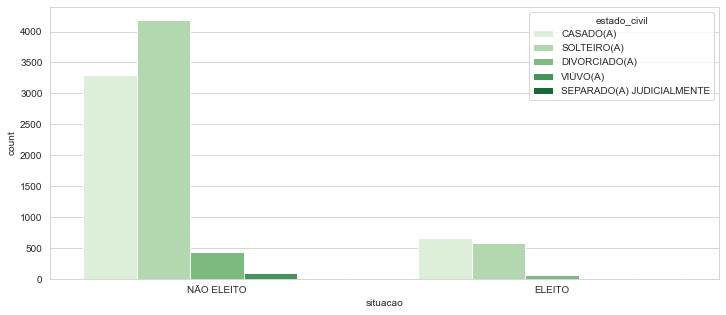

In [50]:
#Distribuição conjunta da situação por estado_civil

plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot(x='situacao',hue='estado_civil',data=df,palette='Greens')

In [51]:
#Contagem de sobrevivente por estado_civil
df.groupby(['estado_civil']).size()

estado_civil
CASADO(A)                    3956
DIVORCIADO(A)                 486
SEPARADO(A) JUDICIALMENTE      26
SOLTEIRO(A)                  4767
VIÚVO(A)                      100
dtype: int64

In [52]:
#Distribuição conjunta da proporção em relação ao total de sobrevivente por estado_civil
data_crosstab = pd.crosstab(df['situacao'],
                            df['estado_civil'], 
                               margins = False,
                           normalize='index')
pd.DataFrame(data_crosstab)

estado_civil,CASADO(A),DIVORCIADO(A),SEPARADO(A) JUDICIALMENTE,SOLTEIRO(A),VIÚVO(A)
situacao,,,,,
ELEITO,0.504950,0.042650,0.004570,0.441736,0.006093
NÃO ELEITO,0.410496,0.053603,0.002493,0.521940,0.011468


50% dos candidatos eleitos são casados;

52% dos candidatos não eleitos são solteiros

<AxesSubplot:xlabel='situacao', ylabel='count'>

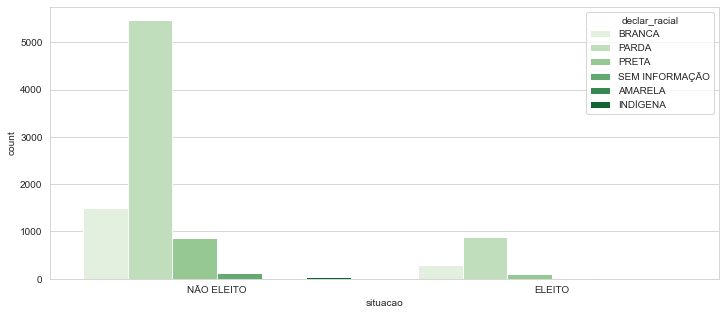

In [53]:
#Distribuição conjunta da situação por declar_racial

plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot(x='situacao',hue='declar_racial',data=df,palette='Greens')

In [54]:
#Contagem de sobrevivente por declar_racial
df.groupby(['declar_racial']).size()

declar_racial
AMARELA             29
BRANCA            1795
INDÍGENA            45
PARDA             6355
PRETA              976
SEM INFORMAÇÃO     135
dtype: int64

In [55]:
#Distribuição conjunta da proporção em relação ao total de sobrevivente por declar_racial
data_crosstab = pd.crosstab(df['situacao'],
                            df['declar_racial'], 
                               margins = False,
                           normalize='index')
pd.DataFrame(data_crosstab)

declar_racial,AMARELA,BRANCA,INDÍGENA,PARDA,PRETA,SEM INFORMAÇÃO
situacao,,,,,,
ELEITO,0.003046,0.227723,0.004570,0.673267,0.080731,0.010663
NÃO ELEITO,0.003116,0.186487,0.004862,0.682000,0.108452,0.015084


67% dos candidatos eleitos se declaram pardos;

68% dos candidatos não eleitos se declaram pardos

<AxesSubplot:xlabel='situacao', ylabel='count'>

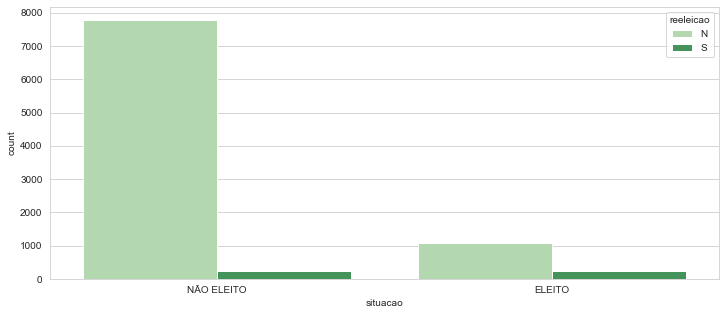

In [56]:
#Distribuição conjunta da situação por reeleicao

plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot(x='situacao',hue='reeleicao',data=df,palette='Greens')

In [57]:
#Contagem de sobrevivente por reeleicao
df.groupby(['reeleicao']).size()

reeleicao
N    8862
S     473
dtype: int64

In [58]:
#Distribuição conjunta da proporção em relação ao total de sobrevivente por reeleicao
data_crosstab = pd.crosstab(df['situacao'],
                            df['reeleicao'], 
                               margins = False,
                           normalize='index')
pd.DataFrame(data_crosstab)

reeleicao,N,S
situacao,,
ELEITO,0.820259,0.179741
NÃO ELEITO,0.970456,0.029544


17% dos candidatos eleitos eram candidatos a reeleição;

97% dos candidatos não eleitos não eram candidatos a reeleição

<AxesSubplot:xlabel='situacao', ylabel='count'>

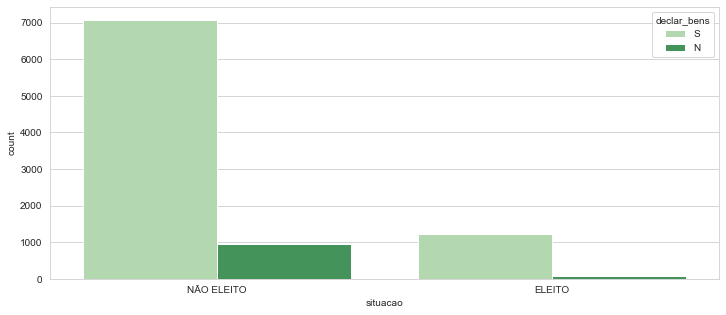

In [59]:
#Distribuição conjunta da situação por declar_bens

plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot(x='situacao',hue='declar_bens',data=df,palette='Greens')

In [60]:
#Contagem de sobrevivente por declar_bens
df.groupby(['declar_bens']).size()

declar_bens
N    1036
S    8299
dtype: int64

In [61]:
#Distribuição conjunta da proporção em relação ao total de sobrevivente por declar_bens
data_crosstab = pd.crosstab(df['situacao'],
                            df['declar_bens'], 
                               margins = False,
                           normalize='index')
pd.DataFrame(data_crosstab)

declar_bens,N,S
situacao,,
ELEITO,0.067022,0.932978
NÃO ELEITO,0.118175,0.881825


93% dos candidatos eleitos declararam bens;

11% dos candidatos não eleitos não declararam bens

##### Sobre as variáveis Categóricas:
Somente 7% das mulheres foram eleitas;

17% dos homens foram eleitos;

39% dos candidatos eleitos possuem ensino médio completo;

37% dos candidatos não eleitos possuem ensino médio completo;

50% dos candidatos eleitos são casados;

52% dos candidatos não eleitos são solteiros;

67% dos candidatos eleitos se declaram pardos;

68% dos candidatos não eleitos se declaram pardos;

17% dos candidatos eleitos eram candidatos a reeleição;

97% dos candidatos não eleitos não eram candidatos a reeleição;

93% dos candidatos eleitos declararam bens;

11% dos candidatos não eleitos não declararam bens;

# Pre-Processamento

In [62]:
# Eliminar colunas que não serão utilizadas
df = df.drop(labels=['nome_completo'], axis = 1)

In [65]:
# Tratamento da variavel uf_nascimento
df.loc[df['uf_nascimento'] == 'PA', 'uf_nascimento'] = 'PA'
df.loc[df['uf_nascimento'] == 'AC', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'AL', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'RO', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'AM', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'AP', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'BA', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'CE', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'DF', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'ES', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'GO', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'MA', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'MG', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'MS', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'MT', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'PB', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'PE', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'PI', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'PR', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'RJ', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'RN', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'RO', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'RR', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'RS', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'SC', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'SE', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'SP', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'TO', 'uf_nascimento'] = 'outros'
df.loc[df['uf_nascimento'] == 'ZZ', 'uf_nascimento'] = 'Estrangeiro'
agrupado = df.groupby(['uf_nascimento']).size()
agrupado

uf_nascimento
Estrangeiro       1
PA             7150
outros         2184
dtype: int64

'UF_Nascimento' ficou agora agrupado em 3 grupos: Estrangeiro, PA e outros

In [67]:
#Tratando a variavel municipio
df.loc[df['municipio'] == 'BELÉM', 'municipio'] = 'GRANDE'
df.loc[df['municipio'] == 'ANANINDEUA', 'municipio'] = 'GRANDE'
df.loc[df['municipio'] == 'SANTARÉM', 'municipio'] = 'GRANDE'
df.loc[df['municipio'] == 'MARABÁ', 'municipio'] = 'GRANDE'
df.loc[df['municipio'] == 'PARAUAPEBAS', 'municipio'] = 'GRANDE'
df.loc[df['municipio'] == 'CASTANHAL', 'municipio'] = 'GRANDE'

df.loc[df['municipio'] == 'ABAETETUBA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'CAMETÁ', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'MARITUBA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'BRAGANÇA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'SÃO FÉLIX DO XINGU', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'BARCARENA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'ALTAMIRA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'TUCURUÍ', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'PARAGOMINAS', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'TAILÂNDIA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'BREVES', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'ITAITUBA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'REDENÇÃO', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'MOJU', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'NOVO REPARTIMENTO', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'ORIXIMINÁ', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'SANTANA DO ARAGUAIA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'SANTA ISABEL DO PARÁ', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'CAPANEMA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'BREU BRANCO', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'TOMÉ-AÇU', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'IPIXUNA DO PARÁ', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'IGARAPÉ-MIRI', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'BENEVIDES', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'PORTEL', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'VISEU', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'DOM ELISEU', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'JACUNDÁ', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'SÃO MIGUEL DO GUAMÁ', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'MONTE ALEGRE', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'ULIANÓPOLIS', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'JURUTI', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'ALENQUER', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'ACARÁ', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'CAPITÃO POÇO', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'VIGIA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'ITUPIRANGA', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'ÓBIDOS', 'municipio'] = 'MEDIO'
df.loc[df['municipio'] == 'RONDON DO PARÁ', 'municipio'] = 'MEDIO'

df.loc[df['municipio'] == 'RURÓPOLIS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'CONCEIÇÃO DO ARAGUAIA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'PACAJÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'BAIÃO', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'URUARÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'AUGUSTO CORRÊA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'XINGUARA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'PORTO DE MOZ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SALINÓPOLIS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'GOIANÉSIA DO PARÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'MUANÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'CURUÇÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'TUCUMÃ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'AFUÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'IGARAPÉ-AÇU', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'CANAÃ DOS CARAJÁS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'ALMEIRIM', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'CURRALINHO', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'ELDORADO DOS CARAJÁS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'CACHOEIRA DO PIRIÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'GURUPÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'CONCÓRDIA DO PARÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'IRITUIA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'OURILÂNDIA DO NORTE', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'OEIRAS DO PARÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SÃO DOMINGOS DO CAPIM', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'MEDICILÂNDIA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SANTO ANTÔNIO DO TAUÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'AURORA DO PARÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'MOCAJUBA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'TRACUATEUA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'PONTA DE PEDRAS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'PLACAS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'BAGRE', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'MÃE DO RIO', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'PRAINHA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'MARACANÃ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'ANAJÁS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'BUJARU', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'LIMOEIRO DO AJURU', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'MARAPANIM', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'MELGAÇO', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'ÁGUA AZUL DO NORTE', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'ANAPU', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SÃO SEBASTIÃO DA BOA VISTA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'GARRAFÃO DO NORTE', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'NOVO PROGRESSO', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SÃO DOMINGOS DO ARAGUAIA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SOURE', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SÃO GERALDO DO ARAGUAIA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SANTA MARIA DO PARÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'CHAVES', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'CACHOEIRA DO ARARI', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SALVATERRA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SÃO JOÃO DE PIRABAS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'NOVA ESPERANÇA DO PIRIÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SANTA MARIA DAS BARREIRAS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SANTA BÁRBARA DO PARÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'FLORESTA DO ARAGUAIA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SANTA LUZIA DO PARÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'TRAIRÃO', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'TERRA SANTA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'RIO MARIA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SÃO CAETANO DE ODIVELAS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'CURIONÓPOLIS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'OURÉM', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'BELTERRA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'BOM JESUS DO TOCANTINS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'NOVA IPIXUNA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'AVEIRO', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'BONITO', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'MOJUÍ DOS CAMPOS', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'SÃO FRANCISCO DO PARÁ', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'NOVA TIMBOTEUA', 'municipio'] = 'PEQUENO'
df.loc[df['municipio'] == 'BRASIL NOVO', 'municipio'] = 'PEQUENO'

df.loc[df['municipio'] == 'VITÓRIA DO XINGU', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'CURUÁ', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'SÃO JOÃO DO ARAGUAIA', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'QUATIPURU', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'CUMARU DO NORTE', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'PIÇARRA', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'COLARES', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'SENADOR JOSÉ PORFÍRIO', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'TERRA ALTA', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'INHANGAPI', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'PRIMAVERA', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'SANTA CRUZ DO ARARI', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'JACAREACANGA', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'MAGALHÃES BARATA', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'PEIXE-BOI', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'PALESTINA DO PARÁ', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'BREJO GRANDE DO ARAGUAIA', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'ABEL FIGUEIREDO', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'FARO', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'SANTARÉM NOVO', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'SÃO JOÃO DA PONTA', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'SAPUCAIA', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'BANNACH', 'municipio'] = 'MINUSCULA'
df.loc[df['municipio'] == 'PAU D ARCO', 'municipio'] = 'MINUSCULA'

agrupado2 = df.groupby(['municipio']).size()
agrupado2

municipio
GRANDE       1254
MEDIO        3415
MINUSCULA     707
PEQUENO      3959
dtype: int64

#### Municipio foi agrupado em GRANDE, MEDIO, MINUSCULO E PEQUENO de acordo com as populações em 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Par%C3%A1_por_popula%C3%A7%C3%A3o'

In [68]:
# Transformar a variável partido

df.loc[df['partido'] == 'MDB', 'partido'] = 'GRANDE'
df.loc[df['partido'] == 'PT', 'partido'] = 'GRANDE'
df.loc[df['partido'] == 'PSDB', 'partido'] = 'GRANDE'
df.loc[df['partido'] == 'PP', 'partido'] = 'GRANDE'
df.loc[df['partido'] == 'PDT', 'partido'] = 'GRANDE'
df.loc[df['partido'] == 'PTB', 'partido'] = 'GRANDE'
df.loc[df['partido'] == 'DEM', 'partido'] = 'GRANDE'

df.loc[df['partido'] == 'PL', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PSB', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'REPUBLICANOS', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'CIDADANIA', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PSC', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PODE', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PC do B', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PSD', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PV', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PATRIOTA', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'SOLIDARIEDADE', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PSOL', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'AVANTE', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PMN', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PTC', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'DC', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PRTB', 'partido'] = 'MEDIO'
df.loc[df['partido'] == 'PROS', 'partido'] = 'MEDIO'

df.loc[df['partido'] == 'PSL', 'partido'] = 'PEQUENO'
df.loc[df['partido'] == 'PMB', 'partido'] = 'PEQUENO'
df.loc[df['partido'] == 'NOVO', 'partido'] = 'PEQUENO'
df.loc[df['partido'] == 'REDE', 'partido'] = 'PEQUENO'
df.loc[df['partido'] == 'PSTU', 'partido'] = 'PEQUENO'
df.loc[df['partido'] == 'PCB', 'partido'] = 'PEQUENO'
df.loc[df['partido'] == 'PCO', 'partido'] = 'PEQUENO'
df.loc[df['partido'] == 'UP', 'partido'] = 'PEQUENO'

agrupado3 = df.groupby(['partido']).size()
agrupado3

partido
GRANDE     4151
MEDIO      5031
PEQUENO     153
dtype: int64

#### Partido foi agrupado em 3 grupos: GRANDE, MEDIO, PEQUENO de acordo com o número de afiliados em 'https://pt.wikipedia.org/wiki/Lista_de_partidos_pol%C3%ADticos_do_Brasil'

In [69]:
#Visualziar os dados transformados
display(df)

,idade_posse,valor_total_declarado,municipio,partido,uf_nascimento,genero,grau_instrucao,estado_civil,declar_racial,reeleicao,declar_bens,situacao
0,33,1285.00,MEDIO,MEDIO,PA,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,N,S,NÃO ELEITO
1,37,2692.70,MEDIO,GRANDE,outros,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,N,S,NÃO ELEITO
2,31,4528.68,GRANDE,MEDIO,PA,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,N,S,NÃO ELEITO
3,31,1943.72,MEDIO,GRANDE,PA,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,N,N,NÃO ELEITO
4,32,600.00,MEDIO,MEDIO,PA,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,N,N,NÃO ELEITO
...,...,...,...,...,...,...,...,...,...,...,...,...
9330,36,4400.00,MINUSCULA,GRANDE,PA,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),SEM INFORMAÇÃO,N,S,NÃO ELEITO
9331,31,10114.45,MEDIO,MEDIO,PA,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,N,S,NÃO ELEITO
9332,33,1500.00,PEQUENO,GRANDE,PA,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,N,S,NÃO ELEITO
9333,33,1100.00,MEDIO,MEDIO,PA,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,S,S,ELEITO


In [70]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['municipio'] = labelencoder.fit_transform(df['municipio'])
df['partido'] = labelencoder.fit_transform(df['partido'])
df['uf_nascimento'] = labelencoder.fit_transform(df['uf_nascimento'])
df['genero'] = labelencoder.fit_transform(df['genero'])
df['grau_instrucao'] = labelencoder.fit_transform(df['grau_instrucao'])
df['estado_civil'] = labelencoder.fit_transform(df['estado_civil'])
df['declar_racial'] = labelencoder.fit_transform(df['declar_racial'])
df['reeleicao'] = labelencoder.fit_transform(df['reeleicao'])
df['declar_bens'] = labelencoder.fit_transform(df['declar_bens'])
df['situacao'] = labelencoder.fit_transform(df['situacao'])
display(df)

,idade_posse,valor_total_declarado,municipio,partido,uf_nascimento,genero,grau_instrucao,estado_civil,declar_racial,reeleicao,declar_bens,situacao
0,33,1285.00,1,1,1,0,2,0,1,0,1,1
1,37,2692.70,1,0,2,1,5,0,3,0,1,1
2,31,4528.68,0,1,1,0,5,0,1,0,1,1
3,31,1943.72,1,0,1,1,2,3,3,0,0,1
4,32,600.00,1,1,1,1,5,3,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9330,36,4400.00,2,0,1,1,2,0,5,0,1,1
9331,31,10114.45,1,1,1,0,2,3,3,0,1,1
9332,33,1500.00,3,0,1,0,2,0,3,0,1,1
9333,33,1100.00,1,1,1,0,5,0,1,1,1,0


,idade_posse,valor_total_declarado,municipio,partido,uf_nascimento,genero,grau_instrucao,estado_civil,declar_racial,reeleicao,declar_bens,situacao
idade_posse,1.000000,0.013375,-0.049368,-0.045682,0.202831,0.066361,-0.043135,-0.273424,-0.020414,0.054731,0.026491,0.023438
valor_total_declarado,0.013375,1.000000,-0.211480,0.005624,0.013191,-0.014103,0.144386,-0.051368,-0.048336,0.114333,0.008017,-0.157023
municipio,-0.049368,-0.211480,1.000000,-0.160667,0.090276,-0.016480,-0.149105,0.043646,-0.023299,0.041618,0.083713,-0.099628
partido,-0.045682,0.005624,-0.160667,1.000000,-0.006271,0.003665,0.031977,-0.010697,-0.010842,-0.035617,-0.027637,0.054774
uf_nascimento,0.202831,0.013191,0.090276,-0.006271,1.000000,0.015941,-0.061951,-0.122143,-0.073561,0.010827,0.043700,-0.006514
genero,0.066361,-0.014103,-0.016480,0.003665,0.015941,1.000000,-0.103697,-0.107882,0.040397,0.084333,0.040250,-0.140733
grau_instrucao,-0.043135,0.144386,-0.149105,0.031977,-0.061951,-0.103697,1.000000,-0.043039,-0.053246,0.008691,-0.000342,-0.028220
estado_civil,-0.273424,-0.051368,0.043646,-0.010697,-0.122143,-0.107882,-0.043039,1.000000,0.034643,-0.072738,-0.045370,0.063530
declar_racial,-0.020414,-0.048336,-0.023299,-0.010842,-0.073561,0.040397,-0.053246,0.034643,1.000000,-0.027659,0.002602,0.043584
reeleicao,0.054731,0.114333,0.041618,-0.035617,0.010827,0.084333,0.008691,-0.072738,-0.027659,1.000000,0.017872,-0.238089


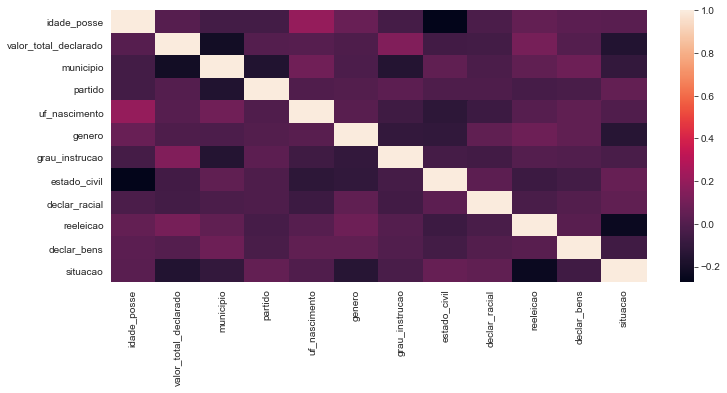

In [71]:
# Verificar a correlação das variáveis
plt.figure(figsize=(12,5))
sns.heatmap(df.corr())
df.corr()

#### Chegamos às seguintes conclusões com base na análise de dados feita até agora. 
* quem é casado tem maior probabilidade de ser eleito;
* 17% dos candidatos eleitos eram candidatos a reeleição;
* 93% dos candidatos eleitos declararam bens;

#### Suposições
* As variáveis que mais tem correlação com a sobreviência são 'valor total declarado', 'genero' e 'reeleição', provavelmente essas variáveis influenciam mais no modelo.

#### Perfil de quem é eleito
* Homem, pardo, casado entre 37 e 51 anos que possui ensino médio completo

#### Perfil de quem não é eleito
* Homem, pardordo, solteiro entre 36 e 48 anos que possui ensino médio completo

In [72]:
# Separar dados em variáveis preditoras e variável alvo

#separamos x de y
y = df['situacao']
X = df.iloc[:,0:11]
X

,idade_posse,valor_total_declarado,municipio,partido,uf_nascimento,genero,grau_instrucao,estado_civil,declar_racial,reeleicao,declar_bens
0,33,1285.00,1,1,1,0,2,0,1,0,1
1,37,2692.70,1,0,2,1,5,0,3,0,1
2,31,4528.68,0,1,1,0,5,0,1,0,1
3,31,1943.72,1,0,1,1,2,3,3,0,0
4,32,600.00,1,1,1,1,5,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9330,36,4400.00,2,0,1,1,2,0,5,0,1
9331,31,10114.45,1,1,1,0,2,3,3,0,1
9332,33,1500.00,3,0,1,0,2,0,3,0,1
9333,33,1100.00,1,1,1,0,5,0,1,1,1


In [73]:
# Balanceamento da classe

sm = SMOTENC(random_state=42, categorical_features=[0,1])
X, y= sm.fit_resample(X, y)
np.bincount(y)

array([8022, 8022], dtype=int64)

In [74]:
# Separar dados em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [75]:
# Balancear escalas
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [76]:
# Balancear Idade
X_train["idade_posse"] = sc.fit_transform( X_train.iloc[:,0:1])
X_test["idade_posse"] = sc.transform(X_test.iloc[:,0:1])
X_train["valor_total_declarado"] = sc.fit_transform( X_train.iloc[:,1:2])
X_test["valor_total_declarado"] = sc.transform(X_test.iloc[:,1:2])

In [78]:
# Salvar Dados em Csv
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# Modelagem

In [79]:
##### bibliotecas de machine learning usadas nesse projeto

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

#### KNN

In [80]:
# Algoritmo KNN K=7

knn1 = KNeighborsClassifier(n_neighbors = 7)
knn1.fit(X_train, y_train)
Y_pred = knn1.predict(X_test)
acc_knn1 = round(knn1.score(X_test, y_test) * 100, 2)
acc_knn1

75.38

In [81]:
# Algoritmo KNN K=5

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train, y_train)
Y_pred = knn2.predict(X_test)
acc_knn2 = round(knn2.score(X_test, y_test) * 100, 2)
acc_knn2

76.09

In [82]:
# Algoritmo KNN K=3

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
Y_pred = knn3.predict(X_test)
acc_knn3 = round(knn3.score(X_test, y_test) * 100, 2)
acc_knn3

77.63

##### Árvore de Decisão

In [83]:
# Algoritmo Árvore de Decisão sem definir a profundidade máxima

decision_tree0 = DecisionTreeClassifier(criterion='entropy', random_state=15) # Árvore com profundidade 2
decision_tree0.fit(X_train, y_train)
Y_pred = decision_tree0.predict(X_test)
acc_decision_tree0 = round(decision_tree0.score(X_test, y_test) * 100, 2)
acc_decision_tree0

78.4

In [84]:
# Algoritmo Árvore de Decisão com profundidade máxima = 2  e entropy

decision_tree1 = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=15) # Árvore com profundidade 2
decision_tree1.fit(X_train, y_train)
Y_pred = decision_tree1.predict(X_test)
acc_decision_tree1 = round(decision_tree1.score(X_test, y_test) * 100, 2)
acc_decision_tree1

65.25

In [85]:
# Algoritmo Árvore de Decisão com profundidade máxima = 2 e gini

decision_tree2 = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=15) # Árvore com profundidade 2
decision_tree2.fit(X_train, y_train)
Y_pred = decision_tree2.predict(X_test)
acc_decision_tree2 = round(decision_tree2.score(X_test, y_test) * 100, 2)
acc_decision_tree2

65.25

In [86]:
# Algoritmo Árvore de Decisão com profundidade máxima = 4 e entropy

decision_tree3 = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=15) # Árvore com profundidade 4
decision_tree3.fit(X_train, y_train)
Y_pred = decision_tree3.predict(X_test)
acc_decision_tree3 = round(decision_tree3.score(X_test, y_test) * 100, 2)
acc_decision_tree3

68.84

In [87]:
# Algoritmo Árvore de Decisão com profundidade máxima = 4 e gini

decision_tree4 = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=15) # Árvore com profundidade 4
decision_tree4.fit(X_train, y_train)
Y_pred = decision_tree4.predict(X_test)
acc_decision_tree4 = round(decision_tree4.score(X_test, y_test) * 100, 2)
acc_decision_tree4

68.92

##### Floresta Aleatória

In [88]:
# Random Forest com criterio entropy

random_forest1 = RandomForestClassifier(n_estimators=1000, criterion= 'entropy', random_state=15)
random_forest1.fit(X_train, y_train)
Y_pred = random_forest1.predict(X_test)
random_forest1.score(X_train, y_train)
acc_random_forest1 = round(random_forest1.score(X_test, y_test) * 100, 2)
acc_random_forest1

84.34

In [89]:
# Random Forest com criterio gini

random_forest2 = RandomForestClassifier(n_estimators=1000, criterion= 'gini', random_state=15)
random_forest2.fit(X_train, y_train)
Y_pred = random_forest2.predict(X_test)
random_forest2.score(X_train, y_train)
acc_random_forest2 = round(random_forest2.score(X_test, y_test) * 100, 2)
acc_random_forest2

84.34

##### Extra Trees

In [90]:
# ExtraTrees com criterio entropy

extra_tress1 = ExtraTreesClassifier(n_estimators=1000, criterion= 'entropy', random_state=15)
extra_tress1.fit(X_train, y_train)
Y_pred = extra_tress1.predict(X_test)
extra_tress1.score(X_train, y_train)
acc_extra_tress1 = round(extra_tress1.score(X_test, y_test) * 100, 2)
acc_extra_tress1

83.36

In [91]:
# ExtraTrees com criterio gini

extra_tress2 = ExtraTreesClassifier(n_estimators=1000, criterion= 'gini', random_state=15)
extra_tress2.fit(X_train, y_train)
Y_pred = extra_tress2.predict(X_test)
extra_tress2.score(X_train, y_train)
acc_extra_tress2 = round(extra_tress2.score(X_test, y_test) * 100, 2)
acc_extra_tress2

83.38

In [92]:
models = pd.DataFrame({
    'Modelo': ['KNN com K=7', 'KNN com K=5', 'KNN com K=3', 
              'Árvore de Decisão padrão', 'Árvore de Decisão com profundidade máxima = 2  e entropy', 
              'Árvore de Decisão com profundidade máxima = 2 e gini', 'Árvore de Decisão com profundidade máxima = 4 e entropy',
              'Árvore de Decisão com profundidade máxima = 4 e gini',
              'Floresta Aleatória (Entropy)', 'Floresta Aleatória (Gini)',
              'ExtraTrees (Entropy)', 'ExtraTrees (Gini)'],
    'Score': [acc_knn1, acc_knn2, acc_knn3, 
              acc_decision_tree0, acc_decision_tree1, acc_decision_tree2, acc_decision_tree3, acc_decision_tree4,
              acc_random_forest1, acc_random_forest2,
             acc_extra_tress1, acc_extra_tress2]})
models.sort_values(by='Score', ascending=False)

,Modelo,Score
8,Floresta Aleatória (Entropy),84.34
9,Floresta Aleatória (Gini),84.34
11,ExtraTrees (Gini),83.38
10,ExtraTrees (Entropy),83.36
3,Árvore de Decisão padrão,78.40
2,KNN com K=3,77.63
1,KNN com K=5,76.09
0,KNN com K=7,75.38
7,Árvore de Decisão com profundidade máxima = 4 ...,68.92
6,Árvore de Decisão com profundidade máxima = 4 ...,68.84


##### O modelo com Score melhor foi o de Floresta Aleatória com critério de entropia

In [93]:
# Verificando outras métricas para o modelo

Previsoes = random_forest1.predict(X_test)

from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_test, Previsoes)
print(Matriz)

[[2099  304]
 [ 450 1961]]


In [94]:
# Verificando a precisão, o recall e o F1
from sklearn.metrics import classification_report

report = classification_report(y_test, Previsoes)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      2403
           1       0.87      0.81      0.84      2411

    accuracy                           0.84      4814
   macro avg       0.84      0.84      0.84      4814
weighted avg       0.84      0.84      0.84      4814



### Vamos prosseguir com o modelo de Floresta Aleatória com critério de Entropia.

# Treinar modelo com menos variáveis

In [95]:
from sklearn.ensemble import ExtraTreesRegressor
# Utilização do algoritmo ExtraTreesRegressor para extrair as características mais importantes
forest = ExtraTreesRegressor()
forest.fit(X_train, y_train)
importancias = forest.feature_importances_
importancias

array([0.20088571, 0.33677756, 0.05490953, 0.04464715, 0.03057826,
       0.04366574, 0.10828053, 0.05831861, 0.06702339, 0.03021253,
       0.024701  ])

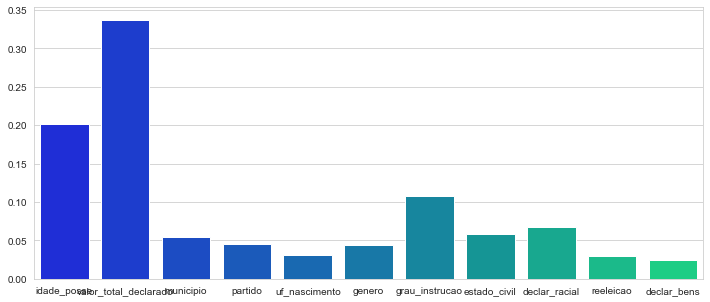

In [96]:
plt.figure(figsize=(12,5))
sns.barplot(x=X_train.columns, y=importancias, palette='winter')
plt.show()

In [211]:
# Criação de nova base de dados utilizando somente os atributos mais importante

X_train2 = X_train.drop('declar_bens', axis=1)
X_test2 = X_test.drop('declar_bens', axis=1)

#X_train2 = X_train2.drop('uf_nascimento', axis=1)
#X_test2 = X_test2.drop('uf_nascimento', axis=1)

#X_train2 = X_train2.drop('reeleicao', axis=1)
#X_test2 = X_test2.drop('reeleicao', axis=1)

#X_train2 = X_train2.drop('genero', axis=1)
#X_test2 = X_test2.drop('genero', axis=1)

#X_train2 = X_train2.drop('partido', axis=1)
#X_test2 = X_test2.drop('partido', axis=1)

#X_train2 = X_train2.drop('municipio', axis=1)
#X_test2 = X_test2.drop('municipio', axis=1)

#X_train2 = X_train2.drop('estado_civil', axis=1)
#X_test2 = X_test2.drop('estado_civil', axis=1)

#X_train2 = X_train2.drop('declar_racial', axis=1)
#X_test2 = X_test2.drop('declar_racial', axis=1)

#X_train2 = X_train2.drop('grau_instrucao', axis=1)
#X_test2 = X_test2.drop('grau_instrucao', axis=1)

display(X_train2)

,idade_posse,valor_total_declarado,municipio,partido,uf_nascimento,genero,grau_instrucao,estado_civil,declar_racial,reeleicao
11611,-0.013310,-0.224203,3,0,1,1,0,0,3,0
5906,-0.217790,-0.120875,3,1,2,0,5,1,3,0
13148,-0.422270,0.726243,3,1,1,1,2,0,1,0
6935,-0.728990,-0.377596,3,0,1,0,2,3,3,0
11242,-0.320030,-0.174404,3,0,1,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...
13123,-0.831230,-0.260961,2,0,1,1,2,3,2,0
3264,1.315809,1.409473,1,1,2,1,0,0,3,0
9845,-0.933470,-0.348657,3,1,1,1,2,0,3,0
10799,-0.013310,-0.419269,2,0,2,1,1,0,1,1


##### KNN

In [212]:
# Algoritmo KNN K=7

knn1 = KNeighborsClassifier(n_neighbors = 7)
knn1.fit(X_train2, y_train)
Y_pred = knn1.predict(X_test2)
acc_knn1 = round(knn1.score(X_test2, y_test) * 100, 2)
acc_knn1

75.88

In [213]:
# Algoritmo KNN K=5

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train2, y_train)
Y_pred = knn2.predict(X_test2)
acc_knn2 = round(knn2.score(X_test2, y_test) * 100, 2)
acc_knn2

76.22

In [214]:
# Algoritmo KNN K=3

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train2, y_train)
Y_pred = knn3.predict(X_test2)
acc_knn3 = round(knn3.score(X_test2, y_test) * 100, 2)
acc_knn3

77.67

##### Árvore de Decisão

In [215]:
# Algoritmo Árvore de Decisão sem definir a profundidade máxima

decision_tree0 = DecisionTreeClassifier(criterion='entropy', random_state=15) # Árvore com profundidade 2
decision_tree0.fit(X_train2, y_train)
Y_pred = decision_tree0.predict(X_test2)
acc_decision_tree0 = round(decision_tree0.score(X_test2, y_test) * 100, 2)
acc_decision_tree0

78.5

In [216]:
# Algoritmo Árvore de Decisão com profundidade máxima = 2  e entropy

decision_tree1 = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=15) # Árvore com profundidade 2
decision_tree1.fit(X_train2, y_train)
Y_pred = decision_tree1.predict(X_test2)
acc_decision_tree1 = round(decision_tree1.score(X_test2, y_test) * 100, 2)
acc_decision_tree1

65.25

In [217]:
# Algoritmo Árvore de Decisão com profundidade máxima = 2 e gini

decision_tree2 = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=15) # Árvore com profundidade 2
decision_tree2.fit(X_train2, y_train)
Y_pred = decision_tree2.predict(X_test2)
acc_decision_tree2 = round(decision_tree2.score(X_test2, y_test) * 100, 2)
acc_decision_tree2

65.25

In [218]:
# Algoritmo Árvore de Decisão com profundidade máxima = 4 e entropy

decision_tree3 = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=15) # Árvore com profundidade 4
decision_tree3.fit(X_train2, y_train)
Y_pred = decision_tree3.predict(X_test2)
acc_decision_tree3 = round(decision_tree3.score(X_test2, y_test) * 100, 2)
acc_decision_tree3

68.84

In [219]:
# Algoritmo Árvore de Decisão com profundidade máxima = 4 e gini

decision_tree4 = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=15) # Árvore com profundidade 4
decision_tree4.fit(X_train2, y_train)
Y_pred = decision_tree4.predict(X_test2)
acc_decision_tree4 = round(decision_tree4.score(X_test2, y_test) * 100, 2)
acc_decision_tree4

68.92

##### Floresta Aleatória

In [220]:
# Random Forest com criterio entropy

random_forest1 = RandomForestClassifier(n_estimators=1000, criterion= 'entropy', random_state=15)
random_forest1.fit(X_train2, y_train)
Y_pred = random_forest1.predict(X_test2)
random_forest1.score(X_train2, y_train)
acc_random_forest1 = round(random_forest1.score(X_test2, y_test) * 100, 2)
acc_random_forest1

83.78

In [221]:
# Random Forest com criterio gini

random_forest2 = RandomForestClassifier(n_estimators=1000, criterion= 'gini', random_state=15)
random_forest2.fit(X_train2, y_train)
Y_pred = random_forest2.predict(X_test2)
random_forest2.score(X_train2, y_train)
acc_random_forest2 = round(random_forest2.score(X_test2, y_test) * 100, 2)
acc_random_forest2

83.76

##### Extra Trees

In [222]:
# ExtraTrees com criterio entropy

extra_tress1 = ExtraTreesClassifier(n_estimators=1000, criterion= 'entropy', random_state=15)
extra_tress1.fit(X_train2, y_train)
Y_pred = extra_tress1.predict(X_test2)
extra_tress1.score(X_train2, y_train)
acc_extra_tress1 = round(extra_tress1.score(X_test2, y_test) * 100, 2)
acc_extra_tress1

83.22

In [223]:
# ExtraTrees com criterio gini

extra_tress2 = ExtraTreesClassifier(n_estimators=1000, criterion= 'gini', random_state=15)
extra_tress2.fit(X_train2, y_train)
Y_pred = extra_tress2.predict(X_test2)
extra_tress2.score(X_train2, y_train)
acc_extra_tress2 = round(extra_tress2.score(X_test2, y_test) * 100, 2)
acc_extra_tress2

83.36

In [224]:
models2 = pd.DataFrame({
    'Modelo': ['KNN com K=7', 'KNN com K=5', 'KNN com K=3', 
              'Árvore de Decisão padrão', 'Árvore de Decisão com profundidade máxima = 2  e entropy', 
              'Árvore de Decisão com profundidade máxima = 2 e gini', 'Árvore de Decisão com profundidade máxima = 4 e entropy',
              'Árvore de Decisão com profundidade máxima = 4 e gini',
              'Floresta Aleatória (Entropy)', 'Floresta Aleatória (Gini)',
              'ExtraTrees (Entropy)', 'ExtraTrees (Gini)'],
    'Score': [acc_knn1, acc_knn2, acc_knn3, 
              acc_decision_tree0, acc_decision_tree1, acc_decision_tree2, acc_decision_tree3, acc_decision_tree4,
              acc_random_forest1, acc_random_forest2,
             acc_extra_tress1, acc_extra_tress2]})
models2.sort_values(by='Score', ascending=False)

,Modelo,Score
8,Floresta Aleatória (Entropy),83.78
9,Floresta Aleatória (Gini),83.76
11,ExtraTrees (Gini),83.36
10,ExtraTrees (Entropy),83.22
3,Árvore de Decisão padrão,78.50
2,KNN com K=3,77.67
1,KNN com K=5,76.22
0,KNN com K=7,75.88
7,Árvore de Decisão com profundidade máxima = 4 ...,68.92
6,Árvore de Decisão com profundidade máxima = 4 ...,68.84


Reduzindo o número de variáveis não obteve resultados melhores, então vamos continuar com o modelo de random forest com criterio de entropia usando todas as variáveis

In [227]:
modelo = RandomForestClassifier(n_estimators=1000, criterion= 'entropy', random_state=15)
modelo.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=15)

In [232]:
z = 1.96
p = round(modelo.score(X_test, y_test),4)

ICI = round((p - z * math.sqrt(p * (1 - p) / len(X_train))) * 100,2)
ICS = round((p + z * math.sqrt(p * (1 - p) / len(X_train))) * 100,2)

print('Com 95% de confiança, o modelo selecionado tem precisão entre ', ICI,'% e ', ICS, '%')

Com 95% de confiança, o modelo selecionado tem precisão entre  83.67 % e  85.01 %
